# Processing and integration of the scRNA data

In [4]:
#%pip install scvi-tools

In [1]:
import scanpy as sc
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import logging
from scipy.sparse import issparse
import anndata as adt
import celltypist
from celltypist import models
import scvi
import pandas as pd

C:\Users\MDV\anaconda3\envs\scvi\lib\site-packages\docrep\decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
C:\Users\MDV\anaconda3\envs\scvi\lib\site-packages\docrep\decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [2]:
print(scvi.__version__)

1.1.6.post2


## Celltypist models and installations

In [3]:
#%pip install celltypist hyperopt ray[tune] 

In [51]:
%pip install --user scikit-misc

In [5]:
models.get_all_models()

['Adult_COVID19_PBMC.pkl',
 'Adult_CynomolgusMacaque_Hippocampus.pkl',
 'Adult_Human_MTG.pkl',
 'Adult_Human_PancreaticIslet.pkl',
 'Adult_Human_PrefrontalCortex.pkl',
 'Adult_Human_Skin.pkl',
 'Adult_Human_Vascular.pkl',
 'Adult_Mouse_Gut.pkl',
 'Adult_Mouse_OlfactoryBulb.pkl',
 'Adult_Pig_Hippocampus.pkl',
 'Adult_RhesusMacaque_Hippocampus.pkl',
 'Autopsy_COVID19_Lung.pkl',
 'Cells_Adult_Breast.pkl',
 'Cells_Fetal_Lung.pkl',
 'Cells_Human_Tonsil.pkl',
 'Cells_Intestinal_Tract.pkl',
 'Cells_Lung_Airway.pkl',
 'COVID19_HumanChallenge_Blood.pkl',
 'COVID19_Immune_Landscape.pkl',
 'Developing_Human_Brain.pkl',
 'Developing_Human_Gonads.pkl',
 'Developing_Human_Hippocampus.pkl',
 'Developing_Human_Organs.pkl',
 'Developing_Human_Thymus.pkl',
 'Developing_Mouse_Brain.pkl',
 'Developing_Mouse_Hippocampus.pkl',
 'Fetal_Human_AdrenalGlands.pkl',
 'Fetal_Human_Pancreas.pkl',
 'Fetal_Human_Pituitary.pkl',
 'Fetal_Human_Retina.pkl',
 'Fetal_Human_Skin.pkl',
 'Healthy_Adult_Heart.pkl',
 'Healthy_

In [6]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [7]:
path_dir_folder_processed_data = 'C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/processed_data'

In [8]:
adatas = [sc.read_h5ad(path_dir_folder_processed_data + '/' + x) for x in os.listdir(path_dir_folder_processed_data)]

In [9]:
adatas[0]

AnnData object with n_obs × n_vars = 7260 × 18087
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'doublet_class'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cells_removed'

In [10]:
# i used models in celltypist :Human_Lung_Atlas & Cells_Lung_Airway

# Query dataset preparation and model training

## Preprocessing query

#### Selection of healthy cells

In [9]:
file_loc = "C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Gene ref data/dataset_annot_scRNA_raw.h5ad"

In [ ]:
query = sc.read_h5ad(file_loc)

In [ ]:
query.obs['disease'].value_counts()

In [15]:
query[query.obs.disease == 'normal'].obs

,suspension_type,donor_id,is_primary_data,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,tissue_ontology_term_id,organism_ontology_term_id,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
CGATGTAAGTTACGGG_SC10,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009899,CL:0000583,HsapDv:0000149,PATO:0000461,HANCESTRO:0008,UBERON:0008946,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 3' v2,normal,Homo sapiens,male,lung parenchyma,Asian,55-year-old stage,LL;0n*@mx8
cc05p_CATGCCTGTGTGCCTG_carraro_csmc,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009899,unknown,unknown,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,unknown,10x 3' v2,normal,Homo sapiens,unknown,lung,unknown,unknown,)rNf~Q0&BX
ATTCTACCAAGGTTCT_HD68,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0011025,CL:0002144,HsapDv:0000135,PATO:0000461,HANCESTRO:0005,UBERON:0008946,NCBITaxon:9606,...,tissue,capillary endothelial cell,10x 5' v1,normal,Homo sapiens,male,lung parenchyma,European,41-year-old stage,5%kv|ie@!5
D062_TGACCCTTCAAACCCA-sub_wang_sub_batch3,nucleus,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0009922,CL:4028004,HsapDv:0000262,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,alveolar type 1 fibroblast cell,10x 3' v3,normal,Homo sapiens,male,lung,unknown,newborn stage (0-28 days),Jq?*-$kHDp
P1_2_TGCTGCTAGCTCCTCT,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0009899,CL:0000583,HsapDv:0000169,PATO:0000461,HANCESTRO:0005,UBERON:0008946,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 3' v2,normal,Homo sapiens,male,lung parenchyma,European,75-year-old stage,Vf*$A^fe9?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_4_GCTTGAACACGACGAA,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0009899,CL:0009089,HsapDv:0000145,PATO:0000461,unknown,UBERON:0001005,NCBITaxon:9606,...,tissue,lung pericyte,10x 3' v2,normal,Homo sapiens,female,respiratory airway,unknown,51-year-old stage,=%nVC9Pi6~
TTGTGGATCGTTCCTG_5-PX5-sub_mould,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009922,CL:0000583,unknown,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 3' v3,normal,Homo sapiens,unknown,lung,unknown,unknown,1Y~Wo08=%L
TCAGGATCAAGACGTG_F02526,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0011025,CL:0002145,HsapDv:0000149,PATO:0000461,HANCESTRO:0010,UBERON:0008946,NCBITaxon:9606,...,tissue,ciliated columnar cell of tracheobronchial tree,10x 5' v1,normal,Homo sapiens,male,lung parenchyma,African,55-year-old stage,APnAX3m%#T
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0011025,CL:0000583,HsapDv:0000158,PATO:0000461,HANCESTRO:0005,UBERON:0002048,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 5' v1,normal,Homo sapiens,male,lung,European,64-year-old stage,5~yXPx7fAJ


In [16]:
query = query[query.obs.disease == 'normal']

In [17]:
query.write('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Gene ref data/query_healthy_cells.h5ad')

In [ ]:
# at this step it can be beneficial to restart the kernel an load this new dataset because the others are too big

#### Verification raw counts & keep only raw data

In [2]:
query = sc.read_h5ad('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Gene ref data/query_healthy_cells.h5ad')

In [3]:
def rmve(query):

    remove = [
        'is_primary_data', 'assay_ontology_term_id',
        'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 
        'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
        'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 
        'BMI', 'age_or_mean_of_age_range', 'age_range', 'cause_of_death', 'fresh_or_frozen',
         'lung_condition', 
        'mixed_ancestry', 
        'smoking_status',  'tissue_dissociation_protocol', 'tissue_level_2', 
        'tissue_level_3', 'tissue_sampling_method', 'tissue_type',  'assay',  'organism',
        'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid',
    
        'suspension_type', 'anatomical_region_ccf_score', 
         'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3',
        'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 
        'entropy_subject_ID_leiden_3', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 
         'original_ann_highest_res', 'original_ann_level_1', 
        'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5',
        'original_ann_nonharmonized', 'reannotation_type', 'reference_genome', 'sample',
        'sequencing_platform', 'size_factors', 'subject_type', 'size_factors', 'sample'
    ]

    query.obs = query.obs[[x for x in query.obs.columns if x not in remove]]
    return query

In [4]:
query = rmve(query)

In [5]:
def qc(adata):
    sc.pp.filter_cells(adata, min_genes = 200)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith("RPS", "RPL")
    adata.var["hb"] = adata.var_names.str.startswith("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(adata,qc_vars=["mt","ribo","hb"], inplace = True, percent_top = [20], log1p=True)

    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo',
              'log1p_total_counts_ribo','total_counts_hb','log1p_total_counts_hb']

    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    return adata

In [6]:
query_raw = adt.AnnData(X=query.raw.X, obs=query.obs, var=query.raw.var)

In [7]:
query_raw = qc(query_raw)

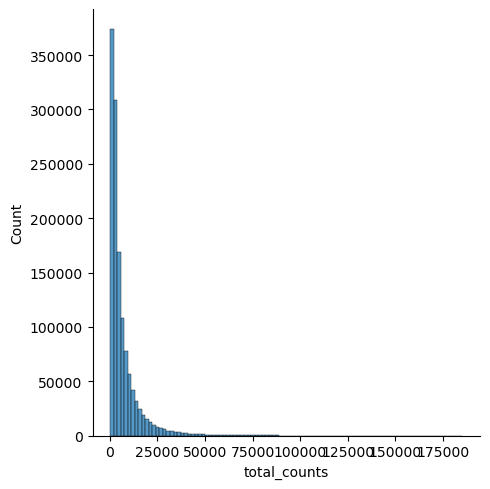

In [8]:
p1 = sns.displot(query_raw.obs["total_counts"], bins=100, kde=False)

In [9]:
query_raw

AnnData object with n_obs × n_vars = 1302742 × 56239
    obs: 'donor_id', "3'_or_5'", 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'core_or_extension', 'log10_total_counts', 'scanvi_label', 'study', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level_1_uncert', 'transf_ann_level_2_label', 'transf_ann_level_2_uncert', 'transf_ann_level_3_label', 'transf_ann_level_3_uncert', 'transf_ann_level_4_label', 'transf_ann_level_4_uncert', 'transf_ann_level_5_label', 'transf_ann_level_5_uncert', 'cell_type', 'disease', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
    var: 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mea

In [10]:
query_raw.write('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Gene ref data/query_raw_healthy_cells.h5ad')

## Download models celltypist

In [10]:
query_celltypist1 = models.Model.load(model='Human_Lung_Atlas.pkl')

In [11]:
query_celltypist1.features

array(['TSPAN6', 'FGR', 'CFH', ..., 'LINC00891', 'LL22NC03-N95F10.1',
       'RP1-34B20.21'], dtype=object)

In [12]:
query_celltypist2 = models.Model.load(model='Cells_Lung_Airway.pkl')

In [13]:
query_celltypist2.cell_types

array(['AT1 ', 'AT2', 'B_memory', 'B_naive', 'B_plasma_IgA',
       'B_plasma_IgG', 'B_plasmablast', 'Basal', 'CD4_EM/Effector',
       'CD4_TRM', 'CD4_naive/CM', 'CD8_EM', 'CD8_EM/EMRA', 'CD8_TRM',
       'CD8_TRM/EM', 'Chondrocyte', 'Ciliated', 'DC_1', 'DC_2',
       'DC_activated', 'DC_plasmacytoid', 'Deuterosomal', 'Dividing_AT2',
       'Dividing_Basal', 'Endothelia_Lymphatic',
       'Endothelia_vascular_Cap_a', 'Endothelia_vascular_Cap_g',
       'Endothelia_vascular_arterial_pulmonary',
       'Endothelia_vascular_arterial_systemic',
       'Endothelia_vascular_venous_pulmonary',
       'Endothelia_vascular_venous_systemic', 'Erythrocyte',
       'Fibro_adventitial', 'Fibro_alveolar', 'Fibro_immune_recruiting',
       'Fibro_myofibroblast', 'Fibro_peribronchial', 'ILC',
       'Ionocyte_n_Brush', 'MAIT', 'Macro_AW_CX3CR1', 'Macro_CCL',
       'Macro_CHIT1', 'Macro_alveolar', 'Macro_alveolar_metallothioneins',
       'Macro_dividing', 'Macro_intermediate', 'Macro_interstitial',


## Model training

## Download ref models

In [14]:
#ref_model = models.Model.load(model="ref.pkl")
ref_model_celltypist1 = models.Model.load(model="Cells_Lung_Airway.pkl")
ref_model_celltypist2 = models.Model.load(model="Human_Lung_Atlas.pkl")

# Prediction cell type using celltypist method 

In [15]:
path_data = "C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/processed_data"

In [16]:
adatas = [sc.read_h5ad(path_data + '/' + x) for x in os.listdir(path_data)]

In [17]:
def predict_cells(adata):
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.normalize_total(adata, target_sum=1e4) #maybe modify it
    sc.pp.log1p(adata)

    adata.X = adata.X.toarray()

    #predictions = celltypist.annotate(adata, model=ref_model, majority_voting=False)
    #predictions_adata = predictions.to_adata()
    #adata.obs["ref_model_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
    #adata.obs["ref_model_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]

    predictions = celltypist.annotate(adata, model=query_celltypist1, majority_voting=False)
    predictions_adata = predictions.to_adata()
    adata.obs["ref_model_celltypist1_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
    adata.obs["ref_model_celltypist1_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]

    predictions = celltypist.annotate(adata, model=query_celltypist2, majority_voting=False)
    predictions_adata = predictions.to_adata()
    adata.obs["ref_model_celltypist2_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
    adata.obs["ref_model_celltypist2_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]
    
    return adata.obs

In [18]:
predictions = [predict_cells(ad.copy()) for ad in adatas]

🔬 Input data has 7260 cells and 14224 genes
🔗 Matching reference genes in the model
🧬 3866 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 7260 cells and 14224 genes
🔗 Matching reference genes in the model
🧬 4003 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 6213 cells and 14022 genes
🔗 Matching reference genes in the model
🧬 3805 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 6213 cells and 14022 genes
🔗 Matching reference genes in the model
🧬 3942 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 6847 cells and 14016 genes
🔗 Matching reference genes in the model
🧬 3793 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 6847 cells and 14016 genes
🔗 Matching reference genes in the model
🧬 3928

In [33]:
predictions = pd.concat(predictions)[['ref_model_celltypist1_label', 'ref_model_celltypist1_score',
                                      'ref_model_celltypist2_label', 'ref_model_celltypist2_score']]

predictions

,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Goblet (nasal),0.319282,Secretory_Goblet,0.999951
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Goblet (nasal),0.951867,Secretory_Goblet,0.999886
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Goblet (nasal),0.825099,Secretory_Goblet,0.999993
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Goblet (nasal),0.357379,Secretory_Goblet,0.999480
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Goblet (nasal),0.602325,Secretory_Goblet,0.999652
...,...,...,...,...
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Goblet (nasal),0.997592,Secretory_Goblet,1.000000
TTTGGACGTGGTTACTAACGGGAA-1-Mock_J6,Goblet (nasal),0.523648,Secretory_Goblet,0.999998
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Goblet (nasal),0.997016,Secretory_Goblet,0.999871
TTTGGCGGTAACTACCAACGGGAA-1-Mock_J6,Goblet (nasal),0.923888,Secretory_Goblet,0.999686


### Reasons explaining the reindexation:
###### Reindexing in order to concatenat correctly the datas. The query that I use need the gene Id and not the gene names

In [24]:
adatas[0].var

,gene_ids,feature_types,genome,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
SAMD11,ENSG00000187634,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,9,0.000818,0.000818,99.918159,9.0,2.302585
NOC2L,ENSG00000188976,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,5323,0.807675,0.592041,51.595890,8882.0,9.091894
KLHL17,ENSG00000187961,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,891,0.088570,0.084865,91.897790,974.0,6.882438
PLEKHN1,ENSG00000187583,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,2216,0.305174,0.266336,79.849050,3356.0,8.118803
PERM1,ENSG00000187642,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,59,0.005729,0.005712,99.463490,63.0,4.158883
...,...,...,...,...,...,...,...,...,...,...,...,...
EGFP,EGFP,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,237,0.733746,0.550284,97.844867,8069.0,8.995909
REPLI,REPLI,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,392,0.503683,0.407917,96.435391,5539.0,8.619750
GLYCO,GLYCO,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,371,0.860144,0.620654,96.626353,9459.0,9.154828
MEMB,MEMB,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,647,2.885332,1.357209,94.116577,31730.0,10.365049


In [19]:
def reindexing(adata):
    
    adata.var = adata.var.reset_index()
    adata.var = adata.var.rename(columns={'index': 'gene_names'})
    adata.var = adata.var.set_index('gene_ids')
    adata.var = adata.var.rename_axis(None)

    return adata

In [20]:
adatas = [reindexing(ad) for ad in adatas]

In [21]:
adatas[2].var

,gene_names,feature_types,genome,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000187634,SAMD11,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,5,0.000474,0.000474,99.952571,5.0,1.791759
ENSG00000188976,NOC2L,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,4223,0.592961,0.465595,59.941188,6251.0,8.740657
ENSG00000187961,KLHL17,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,719,0.072946,0.070408,93.179662,769.0,6.646390
ENSG00000187583,PLEKHN1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,1400,0.190571,0.174433,86.719788,2009.0,7.605890
ENSG00000187642,PERM1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,73,0.007873,0.007842,99.307532,83.0,4.430817
...,...,...,...,...,...,...,...,...,...,...,...,...
EGFP,EGFP,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,8,0.000759,0.000759,99.924113,8.0,2.197225
REPLI,REPLI,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,1,0.000095,0.000095,99.990514,1.0,0.693147
GLYCO,GLYCO,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,6,0.000569,0.000569,99.943085,6.0,1.945910
MEMB,MEMB,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,14,0.001423,0.001422,99.867198,15.0,2.772589


In [31]:
adata = adt.concat(adatas, join="outer", index_unique="-", merge="unique")

In [32]:
adata

AnnData object with n_obs × n_vars = 26183 × 18087
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'doublet_class'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb'

In [33]:
def qc(adata):
    sc.pp.filter_cells(adata, min_genes = 200)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith("RPS", "RPL")
    adata.var["hb"] = adata.var_names.str.startswith("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(adata,qc_vars=["mt","ribo","hb"], inplace = True, percent_top = [20], log1p=True)

    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo',
              'log1p_total_counts_ribo','total_counts_hb','log1p_total_counts_hb']

    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    return adata

In [34]:
adata = qc(adata)

In [35]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet_score,doublet_class
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,0.0,0.0,0.004295,singlet
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,0.0,0.0,0.002755,singlet
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,0.0,0.0,0.149686,singlet
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,0.0,0.0,0.000124,singlet
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,0.0,0.0,0.000208,singlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,0.0,0.0,0.377602,singlet
TTTGGACGTGGTTACTAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,7255,7255,8.889584,40294.0,10.603983,25.492629,0.0,0.0,0.0,0.349392,singlet
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,0.0,0.0,0.157814,singlet
TTTGGCGGTAACTACCAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,4998,4998,8.516993,17457.0,9.767553,27.456035,0.0,0.0,0.0,0.022963,singlet


In [33]:
os.makedirs('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/cvs_prediction', exist_ok = True)

In [35]:
path_csv ='C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/cvs_prediction'

In [35]:
predictions.to_csv(path_csv + '/PREDICTIONS.csv')

In [36]:
os.makedirs('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/adata_post_celltypist', exist_ok = True)

In [37]:
file_path = os.path.join('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/adata_post_celltypist', f'adata_concat_post_celltypist.h5ad')
adata.write(file_path)

# scVI label transfering

In [38]:
#warning : restart kernel to free RAM

In [2]:
adata = sc.read_h5ad('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/adata_post_celltypist/adata_concat_post_celltypist.h5ad')

In [3]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 127189336 stored elements and shape (26183, 18087)>

In [4]:
query = sc.read_h5ad('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Gene ref data/query_raw_healthy_cells.h5ad')

In [5]:
adata.obs['cell_type'] = 'Unknown'
adata.obs['Batch'] = 'Gaia_exp'

In [6]:
sc.pp.filter_genes(query, min_cells = 10)

In [7]:
query.obs['Batch'] = 'query'
query.obs['Id'] = query.obs.donor_id

In [8]:
#query_subset = sc.pp.subsample(query, fraction = 0.25, copy=True)

In [9]:
#query_subset.obs['Batch'] = 'query'
#query_subset.obs['Id'] = query_subset.obs.donor_id

In [10]:
adata.var

,gene_names,feature_types,genome,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000187634,SAMD11,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,15,0.000573,0.000573,99.942711,15.0,2.772589
ENSG00000188976,NOC2L,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,10758,0.602376,0.471487,58.912271,15772.0,9.666055
ENSG00000187961,KLHL17,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,1804,0.074247,0.071620,93.110033,1944.0,7.573017
ENSG00000187583,PLEKHN1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,3977,0.228813,0.206048,84.810755,5991.0,8.698180
ENSG00000187642,PERM1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,166,0.007027,0.007003,99.366001,184.0,5.220356
...,...,...,...,...,...,...,...,...,...,...,...,...
EGFP,EGFP,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,198,0.040026,0.039246,99.243784,1048.0,6.955593
REPLI,REPLI,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,324,0.067830,0.065629,98.762556,1776.0,7.482682
GLYCO,GLYCO,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,318,0.073292,0.070730,98.785471,1919.0,7.560081
MEMB,MEMB,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,545,0.125845,0.118534,97.918497,3295.0,8.100465


In [11]:
dater = sc.concat((adata, query))

In [12]:
dater.obs

,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,cell_type,Batch
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3-0,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,0.0,0.0,Unknown,Gaia_exp
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3-0,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,0.0,0.0,Unknown,Gaia_exp
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3-0,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,0.0,0.0,Unknown,Gaia_exp
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3-0,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,0.0,0.0,Unknown,Gaia_exp
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3-0,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,0.0,0.0,Unknown,Gaia_exp
...,...,...,...,...,...,...,...,...,...,...,...,...
P3_4_GCTTGAACACGACGAA,homosapiens_None_2023_None_sikkemalisa_002_d10...,1268,1268,7.145984,2209.0,7.700748,19.873246,0.0,0.0,0.0,lung pericyte,query
TTGTGGATCGTTCCTG_5-PX5-sub_mould,homosapiens_None_2023_None_sikkemalisa_002_d10...,5559,5559,8.623353,37883.0,10.542284,25.589314,0.0,0.0,0.0,alveolar macrophage,query
TCAGGATCAAGACGTG_F02526,homosapiens_None_2023_None_sikkemalisa_002_d10...,2800,2800,7.937732,7523.0,8.925853,14.382560,0.0,0.0,0.0,ciliated columnar cell of tracheobronchial tree,query
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl,homosapiens_None_2023_None_sikkemalisa_002_d10...,1542,1542,7.341484,4219.0,8.347590,25.171842,0.0,0.0,0.0,alveolar macrophage,query


In [13]:
# It only works if you use the raw counts so wath out

In [14]:
sc.pp.highly_variable_genes(dater, flavor = 'seurat_v3', n_top_genes=2000, batch_key="Batch", subset = True)

In [15]:
print(dater.shape)

(1328925, 2000)


In [19]:
print(pd.Series(dater.obs['Batch']).value_counts())

Batch
query       1302742
Gaia_exp      26183
Name: count, dtype: int64


In [20]:
print(dater.obs['Id'].value_counts().sort_values())

Id
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747VUHD87          8
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747BG9_25         25
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747VUHD076        47
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747muc5288        59
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747NP41           93
                                                                                 ...  
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747NU_CZI01    28028
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747donor 2     28792
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747A40         33279
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747NU_CZI02    36814
homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747D239        53904
Name: count, Length: 272, dtype: int64


In [21]:
dater.obs

,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,cell_type,Batch
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3-0,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,0.0,0.0,Unknown,Gaia_exp
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3-0,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,0.0,0.0,Unknown,Gaia_exp
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3-0,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,0.0,0.0,Unknown,Gaia_exp
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3-0,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,0.0,0.0,Unknown,Gaia_exp
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3-0,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,0.0,0.0,Unknown,Gaia_exp
...,...,...,...,...,...,...,...,...,...,...,...,...
P3_4_GCTTGAACACGACGAA,homosapiens_None_2023_None_sikkemalisa_002_d10...,1268,1268,7.145984,2209.0,7.700748,19.873246,0.0,0.0,0.0,lung pericyte,query
TTGTGGATCGTTCCTG_5-PX5-sub_mould,homosapiens_None_2023_None_sikkemalisa_002_d10...,5559,5559,8.623353,37883.0,10.542284,25.589314,0.0,0.0,0.0,alveolar macrophage,query
TCAGGATCAAGACGTG_F02526,homosapiens_None_2023_None_sikkemalisa_002_d10...,2800,2800,7.937732,7523.0,8.925853,14.382560,0.0,0.0,0.0,ciliated columnar cell of tracheobronchial tree,query
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl,homosapiens_None_2023_None_sikkemalisa_002_d10...,1542,1542,7.341484,4219.0,8.347590,25.171842,0.0,0.0,0.0,alveolar macrophage,query


In [22]:
scvi.model.SCVI.setup_anndata(dater, batch_key='Batch', categorical_covariate_keys = ['Id'])
vae = scvi.model.SCVI(dater)
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX 4500 Ada Generation') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/6 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=6` reached.


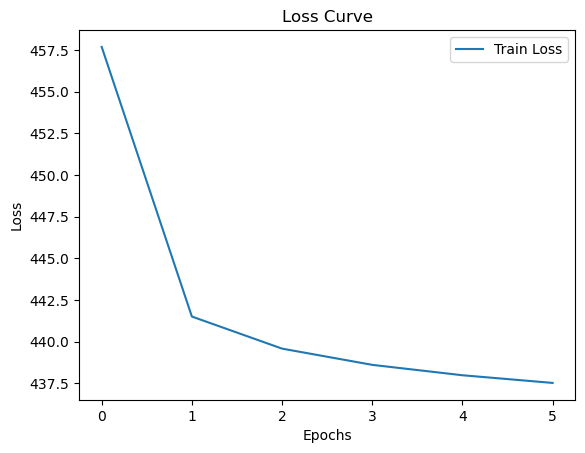

In [23]:
plt.plot(vae.history["reconstruction_loss_train"], label="Train Loss")
#plt.plot(vae.history["reconstruction_loss_validation"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

In [24]:
#print(vae.history.keys())


In [25]:
lvae = scvi.model.SCANVI.from_scvi_model(vae, adata = dater, unlabeled_category = 'Unknown',
                                        labels_key = 'cell_type')

lvae.train(max_epochs=25, n_samples_per_label=400, train_size=0.7, check_val_every_n_epoch=1)

INFO     Training for 25 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/25 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.


In [28]:
print(lvae.history.keys())

dict_keys(['train_loss_step', 'validation_loss', 'elbo_validation', 'reconstruction_loss_validation', 'kl_local_validation', 'kl_global_validation', 'validation_classification_loss', 'validation_accuracy', 'validation_f1_score', 'validation_calibration_error', 'train_loss_epoch', 'elbo_train', 'reconstruction_loss_train', 'kl_local_train', 'kl_global_train', 'train_classification_loss', 'train_accuracy', 'train_f1_score', 'train_calibration_error'])


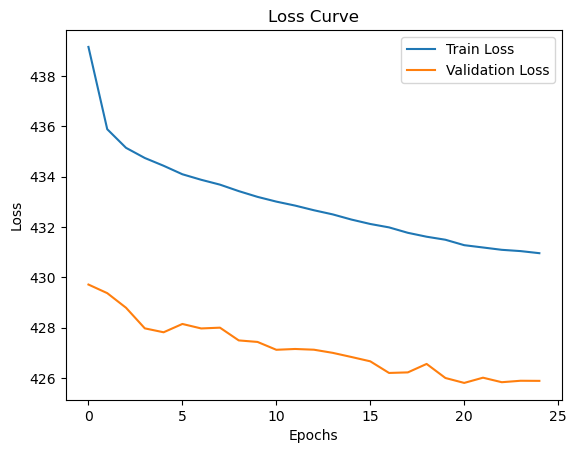

In [29]:
plt.plot(lvae.history["reconstruction_loss_train"], label="Train Loss")
plt.plot(lvae.history["reconstruction_loss_validation"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

In [30]:
dater.obs['predicted'] = lvae.predict(dater)

In [31]:
dater.obs['transfer_score'] = lvae.predict(soft = True).max(axis = 1)

In [32]:
dater = dater[dater.obs.Batch == 'Gaia_exp']

In [33]:
dater

View of AnnData object with n_obs × n_vars = 26183 × 2000
    obs: 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'cell_type', 'Batch', '_scvi_batch', '_scvi_labels', 'predicted', 'transfer_score'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_categorical_covs'

In [34]:
dater.obs[['predicted', 'transfer_score']]

,predicted,transfer_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3-0,club cell,0.730610
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3-0,bronchial goblet cell,0.999989
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3-0,bronchial goblet cell,0.679915
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3-0,nasal mucosa goblet cell,0.899082
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3-0,club cell,0.999511
...,...,...
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6-3,nasal mucosa goblet cell,0.999669
TTTGGACGTGGTTACTAACGGGAA-1-Mock_J6-3,bronchial goblet cell,0.999922
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6-3,epithelial cell of lower respiratory tract,0.998977
TTTGGCGGTAACTACCAACGGGAA-1-Mock_J6-3,acinar cell,0.872900


In [35]:
adata.obs = adata.obs.merge(right = dater.obs[['predicted', 'transfer_score']], left_index=True, right_index=True)

In [36]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet_score,doublet_class,cell_type,Batch,predicted,transfer_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,0.0,0.0,0.004295,singlet,Unknown,Gaia_exp,club cell,0.730610
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,0.0,0.0,0.002755,singlet,Unknown,Gaia_exp,bronchial goblet cell,0.999989
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,0.0,0.0,0.149686,singlet,Unknown,Gaia_exp,bronchial goblet cell,0.679915
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,0.0,0.0,0.000124,singlet,Unknown,Gaia_exp,nasal mucosa goblet cell,0.899082
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,0.0,0.0,0.000208,singlet,Unknown,Gaia_exp,club cell,0.999511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,0.0,0.0,0.377602,singlet,Unknown,Gaia_exp,nasal mucosa goblet cell,0.999669
TTTGGACGTGGTTACTAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,7255,7255,8.889584,40294.0,10.603983,25.492629,0.0,0.0,0.0,0.349392,singlet,Unknown,Gaia_exp,bronchial goblet cell,0.999922
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,0.0,0.0,0.157814,singlet,Unknown,Gaia_exp,epithelial cell of lower respiratory tract,0.998977
TTTGGCGGTAACTACCAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,4998,4998,8.516993,17457.0,9.767553,27.456035,0.0,0.0,0.0,0.022963,singlet,Unknown,Gaia_exp,acinar cell,0.872900


In [37]:
path_csv ='C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/cvs_prediction'

In [38]:
predictions = pd.read_csv(path_csv + '/PREDICTIONS.csv', index_col=0)

In [39]:
predictions

,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Goblet (nasal),0.319282,Secretory_Goblet,0.999951
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Goblet (nasal),0.951867,Secretory_Goblet,0.999886
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Goblet (nasal),0.825099,Secretory_Goblet,0.999993
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Goblet (nasal),0.357379,Secretory_Goblet,0.999480
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Goblet (nasal),0.602325,Secretory_Goblet,0.999652
...,...,...,...,...
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Goblet (nasal),0.997592,Secretory_Goblet,1.000000
TTTGGACGTGGTTACTAACGGGAA-1-Mock_J6,Goblet (nasal),0.523648,Secretory_Goblet,0.999998
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Goblet (nasal),0.997016,Secretory_Goblet,0.999871
TTTGGCGGTAACTACCAACGGGAA-1-Mock_J6,Goblet (nasal),0.923888,Secretory_Goblet,0.999686


In [40]:
adata.obs.index = adata.obs.index.str.replace(r'-\d+$', '', regex=True)
adata.obs_names = adata.obs.index

In [41]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet_score,doublet_class,cell_type,Batch,predicted,transfer_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,0.0,0.0,0.004295,singlet,Unknown,Gaia_exp,club cell,0.730610
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,0.0,0.0,0.002755,singlet,Unknown,Gaia_exp,bronchial goblet cell,0.999989
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,0.0,0.0,0.149686,singlet,Unknown,Gaia_exp,bronchial goblet cell,0.679915
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,0.0,0.0,0.000124,singlet,Unknown,Gaia_exp,nasal mucosa goblet cell,0.899082
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,0.0,0.0,0.000208,singlet,Unknown,Gaia_exp,club cell,0.999511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,0.0,0.0,0.377602,singlet,Unknown,Gaia_exp,nasal mucosa goblet cell,0.999669
TTTGGACGTGGTTACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,7255,7255,8.889584,40294.0,10.603983,25.492629,0.0,0.0,0.0,0.349392,singlet,Unknown,Gaia_exp,bronchial goblet cell,0.999922
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,0.0,0.0,0.157814,singlet,Unknown,Gaia_exp,epithelial cell of lower respiratory tract,0.998977
TTTGGCGGTAACTACCAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,4998,4998,8.516993,17457.0,9.767553,27.456035,0.0,0.0,0.0,0.022963,singlet,Unknown,Gaia_exp,acinar cell,0.872900


In [42]:
adata.obs = adata.obs.merge(right = predictions, left_index=True, right_index=True)

In [43]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,...,doublet_score,doublet_class,cell_type,Batch,predicted,transfer_score,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,...,0.004295,singlet,Unknown,Gaia_exp,club cell,0.730610,Goblet (nasal),0.319282,Secretory_Goblet,0.999951
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,...,0.002755,singlet,Unknown,Gaia_exp,bronchial goblet cell,0.999989,Goblet (nasal),0.951867,Secretory_Goblet,0.999886
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,...,0.149686,singlet,Unknown,Gaia_exp,bronchial goblet cell,0.679915,Goblet (nasal),0.825099,Secretory_Goblet,0.999993
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,...,0.000124,singlet,Unknown,Gaia_exp,nasal mucosa goblet cell,0.899082,Goblet (nasal),0.357379,Secretory_Goblet,0.999480
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,...,0.000208,singlet,Unknown,Gaia_exp,club cell,0.999511,Goblet (nasal),0.602325,Secretory_Goblet,0.999652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,...,0.377602,singlet,Unknown,Gaia_exp,nasal mucosa goblet cell,0.999669,Goblet (nasal),0.997592,Secretory_Goblet,1.000000
TTTGGACGTGGTTACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,7255,7255,8.889584,40294.0,10.603983,25.492629,0.0,...,0.349392,singlet,Unknown,Gaia_exp,bronchial goblet cell,0.999922,Goblet (nasal),0.523648,Secretory_Goblet,0.999998
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,...,0.157814,singlet,Unknown,Gaia_exp,epithelial cell of lower respiratory tract,0.998977,Goblet (nasal),0.997016,Secretory_Goblet,0.999871
TTTGGCGGTAACTACCAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,4998,4998,8.516993,17457.0,9.767553,27.456035,0.0,...,0.022963,singlet,Unknown,Gaia_exp,acinar cell,0.872900,Goblet (nasal),0.923888,Secretory_Goblet,0.999686


In [44]:
os.makedirs('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/unintegrated_scvilabels', exist_ok = True)

In [2]:
path_unintegrated_data = 'C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/unintegrated_scvilabels'

In [46]:
adata.write_h5ad(path_unintegrated_data +'/unintigrated.h5ad')

... storing 'cell_type' as categorical
... storing 'Batch' as categorical
... storing 'predicted' as categorical
... storing 'ref_model_celltypist1_label' as categorical
... storing 'ref_model_celltypist2_label' as categorical


# Integration

In [3]:
#from scvi import autotune
import tempfile
from scvi.autotune import run_autotune
import ray
import scanpy as sc
import scvi
import seaborn as sns
import torch
from ray import tune
from scvi import autotune
import os
from matplotlib import pyplot as plt
import numpy as np
import scipy.sparse as sp

In [48]:
import scvi.autotune
print(dir(scvi.autotune))

['AutotuneExperiment', 'ScibTuneReportCheckpointCallback', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_experiment', '_tune', 'error_on_missing_dependencies', 'run_autotune']


In [4]:
adata = sc.read_h5ad(path_unintegrated_data +'/unintigrated.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 26183 × 18087
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'doublet_class', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

## Creation of X train and X test

In [6]:
epsilon = 0.6 
X_dense = adata.X.toarray() if sp.issparse(adata.X) else adata.X


X_train = np.random.binomial(X_dense.astype(int), epsilon)
X_test = X_dense - X_train

if sp.issparse(adata.X):
    X_train = sp.csr_matrix(X_train)
    X_test = sp.csr_matrix(X_test)

adata.layers["train"] = X_train
adata.layers["test"] = X_test

In [7]:
adata

AnnData object with n_obs × n_vars = 26183 × 18087
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'doublet_class', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'train', 'test'

In [8]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

INFO: Seed set to 0
Seed set to 0


Last run with scvi-tools version: 1.3.0


In [9]:
sc.pp.filter_genes(adata, min_cells = 50)

In [10]:
adata

AnnData object with n_obs × n_vars = 26183 × 13918
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'doublet_class', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'train', 'test'

### Selection of parameters

### Use X_train

In [11]:
adata.X = adata.layers["train"]

In [12]:
model_cls = scvi.model.SCVI
model_cls.setup_anndata(adata)

In [13]:
#scvi_tuner = autotune.ModelTuner(model_cls)

In [14]:
#model_cls = scvi.model.SCVI
#model_cls.setup_anndata(adata,
                            # continuous_covariate_keys=['pct_counts_mt', 'pct_counts_ribo'])

#tuner = ModelTuner(model_cls)

In [15]:
#tuner.info()

In [16]:
#search_space = {
#    "n_hidden": tune.choice([92, 128, 192, 256]),
#    "n_latent": tune.choice([10, 20, 30, 40, 50, 60]),
#    "n_layers": tune.choice([1, 2, 3]),
#    "lr": tune.loguniform(1e-4, 1e-2),
#    "gene_likelihood": tune.choice(["nb", "zinb"])}

In [17]:
search_space = {
    "model_params": {
        "n_hidden": tune.choice([92, 128, 192, 256]),
        "n_latent": tune.choice([10, 20, 30, 40, 50, 60]),
        "n_layers": tune.choice([1, 2, 3]),
        "gene_likelihood": tune.choice(["nb", "zinb"])
    },
    "train_params": {
        "max_epochs": 5,
        "plan_kwargs": {
            "lr": tune.loguniform(1e-4, 1e-2)
        }
    }
}

In [18]:
logging_dir = os.path.abspath("G:/ray_logs")

In [19]:
def short_dirname_creator(trial):
    return f"trial_{trial.trial_id}"

In [ ]:
results = autotune.run_autotune(
    model_cls,
    data=adata,
    mode="min",
    metrics="validation_loss",
    search_space=search_space,
    num_samples= 144, # the total number of combinaison possible, you have to give a specific number
    resources={"cpu": 10, "gpu": 1},
    ignore_reinit_error=True
)

2025-04-24 15:33:56,603	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\MDV\AppData\Local\Temp\ray\session_2025-04-24_10-56-04_308471_54300\artifacts\2025-04-24_15-33-56\scvi_15c2d5f7-51df-48c9-b47d-8c0fe1f4cc5d\driver_artifacts\_trainable_eb9a83b2_1_gene_likelihood=zinb,n_hidden=128,n_latent=30,n_layers=1,max_epochs=2,lr=0.0006_2025-04-24_15-33-56
2025-04-24 15:33:56,608	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\MDV\AppData\Local\Temp\ray\session_2025-04-24_10-56-04_308471_54300\artifacts\2025-04-24_15-33-56\scvi_15c2d5f7-51df-48c9-b47d-8c0fe1f4cc5d\driver_artifacts\_trainable_eb9a83b2_1_gene_likelihood=zinb,n_hidden=128,n_latent=30,n_layers=1,max_epochs=2,lr=0.0006_2025-04-24_15-33-56
2025-04-24 15:34:14,857	WARNING tune.py:219 -- Stop signal recei

In [ ]:
#results = tuner.fit(adata, metric="validation_loss",
#                    resources = {'gpu': 1}, #have to specify gpu or might not use
#                    search_space = search_space,
#                   num_samples = 100,
#                   max_epochs = 20,
#                    logging_dir = logging_dir 
#                   )

In [21]:
result_grid = results.result_grid

In [23]:
best_vl = 10000
best_i = 0
for i, res in enumerate(results.result_grid):
    vl = res.metrics['validation_loss']

    if vl < best_vl:
        best_vl = vl
        best_i = i

In [25]:
results.result_grid[best_i]

Result(
  metrics={'validation_loss': 9490.1533203125},
  path='C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Code/Jupyter notebook/scvi_log/scvi_57eee6c3-30e7-4334-b896-78ab33e1d6fe/scvi_57eee6c3-30e7-4334-b896-78ab33e1d6fe/_trainable_4c634d23_73_gene_likelihood=zinb,n_hidden=128,n_latent=10,n_layers=1,max_epochs=2,lr=0.0099_2025-04-24_11-36-17',
  filesystem='local',
  checkpoint=None
)

In [26]:
#take the metrics from results and use them for integration parameters 

### Run the integration model

In [27]:
scvi.model.SCVI.setup_anndata(adata,
                             continuous_covariate_keys=['pct_counts_mt', 'pct_counts_ribo'])

In [28]:
model = scvi.model.SCVI(adata,  n_hidden=128,n_latent=10,n_layers=1, gene_likelihood = 'zinb')

In [29]:
kwargs = {'lr': 0.0026}

In [30]:
model.train(max_epochs = 200, early_stopping = True, plan_kwargs = kwargs)

INFO: GPU available: True (cuda), used: True
GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA RTX 4500 Ada Generation') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
You are using a CUDA device ('NVIDIA RTX 4500 Ada Generation') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
IN

Training:   0%|          | 0/200 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 45 records. Best score: 9334.569. Signaling Trainer to stop.


In [34]:
os.makedirs('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/the_model1', exist_ok=True)

In [35]:
path_folder_model_integ = 'C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/the_model1'

In [36]:
model.save(path_folder_model_integ + '/the_model_X_train')

In [37]:
#restart kernel to free RAM if necessary

In [38]:
model = scvi.model.SCVI.load(path_folder_model_integ + '/the_model_X_train', adata)

INFO     File C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/the_model1/the_model_X_train\model.pt      
         already downloaded                                                                                        


In [39]:
y = model.history['reconstruction_loss_validation']['reconstruction_loss_validation'].min()

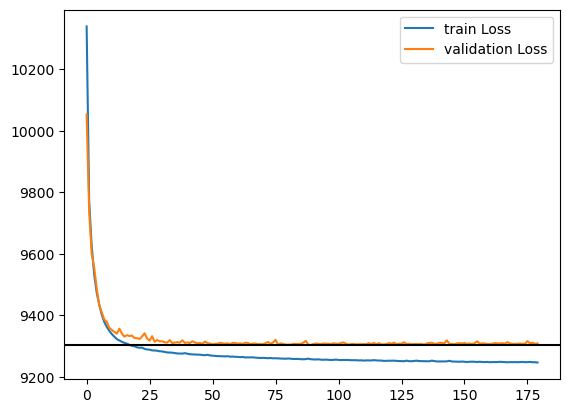

In [40]:
plt.plot(model.history['reconstruction_loss_train']['reconstruction_loss_train'], label='train Loss')
plt.plot(model.history['reconstruction_loss_validation']['reconstruction_loss_validation'], label='validation Loss')

plt.axhline(y, c = 'k')

plt.legend()
plt.show()

In [41]:
adata

AnnData object with n_obs × n_vars = 26183 × 13918
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'doublet_class', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score', '_scvi_batch', '_scvi_labels'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_continuous_covs'
    layers: 'train', 'test'

In [42]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [43]:
adata.obsm['X_scVI'].shape

(26183, 10)

In [44]:
os.makedirs('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/integrated_data', exist_ok=True)

In [45]:
path_integrated = 'C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/integrated_data'

In [46]:
adata.write_h5ad('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/integrated_data' +'/'+ 'integrated_data.h5ad')

In [47]:
adata

AnnData object with n_obs × n_vars = 26183 × 13918
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'doublet_class', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score', '_scvi_batch', '_scvi_labels'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_continuous_covs', 'X_scVI'
    layers: 'train', 'test'

In [54]:
##### Finishhhhhhheeeedddd